In [1]:
# %pip install -qU graphql-core pandas matplotlib

In [2]:
# SCHEMA_PATH = 'GraphQLClients/spaceXplayground/schema.graphql'
# QUERIES_PATH = 'GraphQLClients/spaceXplayground/Queries'

In [3]:
clients=["InternalClient", "ExternalAuthClient", "ExternalPublicClient"]

In [4]:
client = clients[0]
BASE_DIR="C:/Users/SFP7ZGX/Downloads/repos/Post.Taf.SendungenAPI/SendungenApi/GraphQlClients"
SCHEMA_PATH=f"{BASE_DIR}/{client}/schema.graphql"
QUERIES_PATH=f"{BASE_DIR}/{client}/Queries"
SCHEMA_PATH, QUERIES_PATH

('C:/Users/SFP7ZGX/Downloads/repos/Post.Taf.SendungenAPI/SendungenApi/GraphQlClients/InternalClient/schema.graphql',
 'C:/Users/SFP7ZGX/Downloads/repos/Post.Taf.SendungenAPI/SendungenApi/GraphQlClients/InternalClient/Queries')

In [5]:
from os.path import isfile, isdir
assert isfile(SCHEMA_PATH)
assert isdir(QUERIES_PATH)

In [6]:
from load_schema import load_schema
from load_queries import load_queries
from extract_fields import extract_fields
from extract_root_types import extract_root_types
from get_schema_fields import get_schema_fields
from parse_schema import parse_schema
from parse_queries_and_extract_fields import parse_queries_and_extract_fields
from calculate_coverage import calculate_coverage
from generate_report import generate_report

In [7]:
only_leafs = False
# When `only_leafs=False`: We extract all fields. This provides a comprehensive list of every field available in the schema, capturing the complete hierarchical structure.
# When `only_leafs=True`: We target only the leaf fields—those that do not have any further sub-fields. This results in a set of terminal fields, omitting intermediate nodes in the hierarchy.

In [8]:
# The function starts by loading the entire schema from a file.
# It then identifies the Query and Mutation types, which are the root types of the schema.
# extracts all the fields defined within the schema.
# This is accomplished by calling the `get_schema_fields` function, which traverses the schema starting from the root types and collects field names.
schema_fields = parse_schema(SCHEMA_PATH, only_leafs=only_leafs)
len(schema_fields)

306

In [9]:
list(schema_fields)[:10]

['einzelsendung.estimatedDelivery.startDate',
 'einzelsendung.paymentInformation.payableAmounts.type',
 'einzelsendung.packageRedirections.neighbor.isSelected',
 'einzelsendung.hasPayment',
 'sendungen.sendungen.possibleRedirections.branchesParcelLocker',
 'sendungen.sendungen.customsInformation.userDocumentNeededTimestamp',
 'sendungen.sendungen.originalIdentityCode',
 'sendungen.sendungen.recipientAddress.consigneeStreet',
 'sendungen.sendungen.packageRedirections.parcellocker.selectedBranch',
 'einzelsendung.possibleRedirections.redirectionAreaCode']

In [10]:
# recursively searches the specified directory for all `.graphql` files
# It reads each found query file, storing its file path and content as tuples in a list.
# it returns a list of tuples, each containing the file path and the corresponding query content.
queries = load_queries(QUERIES_PATH)
len(queries)

24

In [11]:
queries[0]

('C:/Users/SFP7ZGX/Downloads/repos/Post.Taf.SendungenAPI/SendungenApi/GraphQlClients/InternalClient/Queries\\AddShipmentToReceive.graphql',
 'mutation AddShipmentToReceive(\n    $ssoid: String!,\n    $identcode: String!,\n    $description: String) {\n    \n    addSendungEmpfang(\n        ssoid: $ssoid\n        sendung: { sendungsnummer: $identcode, bezeichnung: $description }\n    )\n}\n')

In [12]:
# It parses each query, including handling fragments, and extracts hierarchical field names based on the `only_leafs` parameter.
# The function maintains a `defaultdict` to count how many queries each field appears in and a `set` of all unique fields used across queries.
# Finally, it returns a tuple containing the field usage counts and the set of used fields.
field_usage, used_fields = parse_queries_and_extract_fields(queries, only_leafs=only_leafs)

Error parsing C:/Users/SFP7ZGX/Downloads/repos/Post.Taf.SendungenAPI/SendungenApi/GraphQlClients/InternalClient/Queries\GetNotificationAndEvents.graphql: Syntax Error: Unexpected character: U+00EF.

GraphQL request:1:1
1 | ï»¿query GetNotificationAndEvents($shipmentId: String, $ssoid: String) {
  | ^
2 |     einzelsendung(sendungsnummer: $shipmentId, ssoid: $ssoid) {


In [13]:
field_usage

defaultdict(int,
            {'addSendungEmpfang': 1,
             'addSendungVersand': 2,
             'einzelsendung.activeIdentityCode': 5,
             'einzelsendung.bezeichnung': 1,
             'einzelsendung': 5,
             'einzelsendung.sender': 2,
             'einzelsendung.recipientAddress.consigneeStreetNr': 2,
             'einzelsendung.recipientAddress.consigneeName': 2,
             'einzelsendung.recipientAddress': 2,
             'einzelsendung.ssoidmatch': 5,
             'einzelsendung.possibleRedirectionsNoDepositories.datum': 2,
             'einzelsendung.possibleRedirections.redirectionAreaCode': 3,
             'einzelsendung.possibleRedirectionsNoDepositories.branchesParcelLocker': 2,
             'einzelsendung.possibleRedirectionsNoDepositories.zustelldatum': 2,
             'einzelsendung.possibleRedirections.abstellort': 3,
             'einzelsendung.possibleRedirections.branchesPostOffice': 3,
             'einzelsendung.possibleRedirectionsNoDeposit

In [14]:
used_fields

{'addSendungEmpfang',
 'addSendungVersand',
 'einzelsendung',
 'einzelsendung.activeIdentityCode',
 'einzelsendung.bezeichnung',
 'einzelsendung.customsInformation',
 'einzelsendung.customsInformation.customsDocumentAvailable',
 'einzelsendung.customsInformation.userDocumentNeeded',
 'einzelsendung.dimensions',
 'einzelsendung.dimensions.height',
 'einzelsendung.dimensions.length',
 'einzelsendung.dimensions.width',
 'einzelsendung.externalIdentityCode',
 'einzelsendung.hasPayment',
 'einzelsendung.isMeineSendung',
 'einzelsendung.isRecipient',
 'einzelsendung.lastEventDate',
 'einzelsendung.originalIdentityCode',
 'einzelsendung.packageRedirections',
 'einzelsendung.packageRedirections.customdeliveryday',
 'einzelsendung.packageRedirections.customdeliveryday.customDeliveryDates',
 'einzelsendung.packageRedirections.customdeliveryday.estimatedDelivery',
 'einzelsendung.packageRedirections.customdeliveryday.isSelected',
 'einzelsendung.packageRedirections.customdeliveryday.selectedCusto

In [15]:
# Compute missing fields: those used but not defined in the schema
missing_fields = used_fields - schema_fields
# Assert that there are no missing fields. If there are, include them in the error message.
assert not missing_fields, (
    f"All used fields must be defined in the schema. The following fields are missing: {missing_fields}"
)

In [18]:
# The `calculate_coverage` function assesses how extensively the GraphQL schema is utilized by the queries.
# It takes two sets: `schema_fields`, which contains all the hierarchical field names defined in the schema, and `used_fields`, 
# which includes the field names actually used in the queries.
# Optionally, it can normalize the field names to lowercase for case-insensitive comparison.
# The function computes the coverage percentage by determining the proportion of `schema_fields` that are present in `used_fields`.
# It then returns this percentage along with the sets of covered and uncovered fields.
coverage, covered, uncovered = calculate_coverage(schema_fields, used_fields)
coverage

43.90243902439025

Schema Coverage: 43.90%

Total Fields: 41
Covered Fields: 18
Uncovered Fields: 23

Detailed Field Usage:
                                                       Field  Usage Count  Covered
                                               einzelsendung            2     True
                            einzelsendung.activeIdentityCode            2     True
                                        einzelsendung.status            1     True
                           einzelsendung.sendungsEvents.text            1     True
                         einzelsendung.sendungsEvents.status            1     True
                                    einzelsendung.hasPayment            1     True
                             einzelsendung.dimensions.height            1     True
                         einzelsendung.sendungsEvents.textEn            1     True
                      einzelsendung.sendungsEvents.timestamp            1     True
                                        einzelsendung.weight     

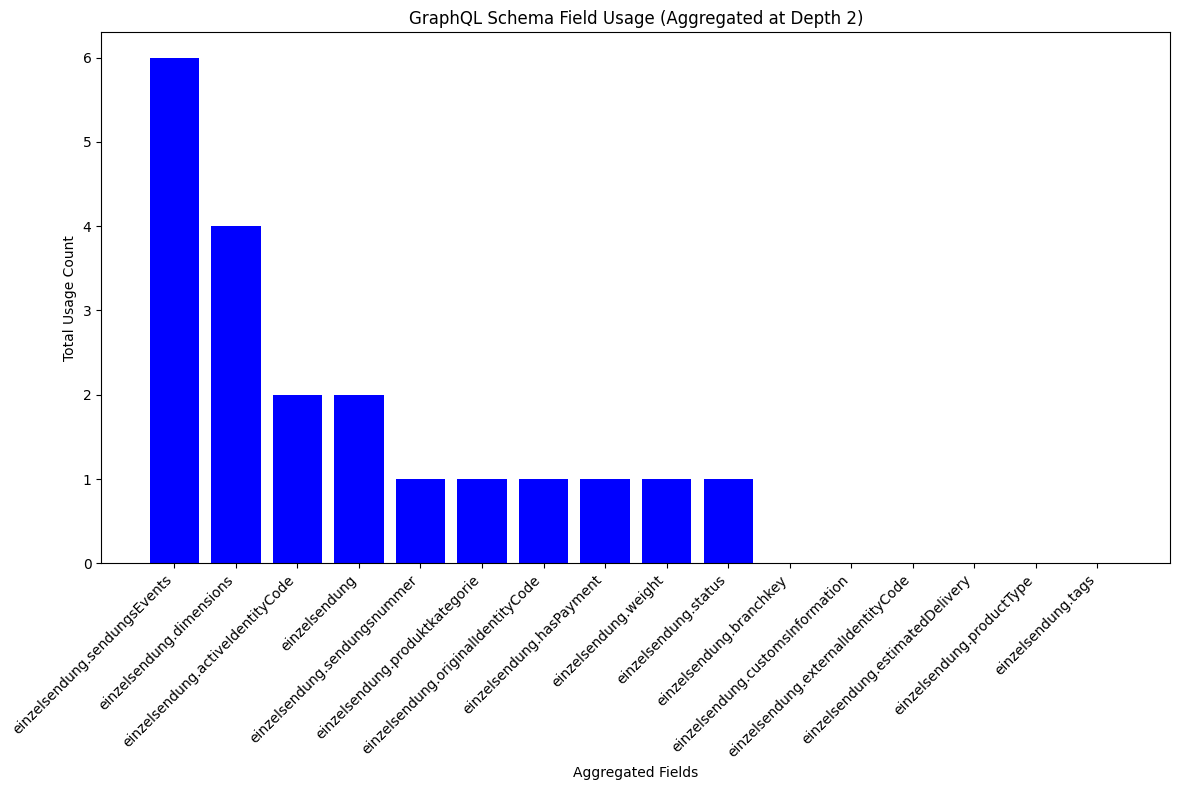

In [20]:
# The `generate_report` function creates a comprehensive coverage report of GraphQL schema fields used in queries.
# It takes the coverage percentage, a dictionary of field usage counts, the complete set of schema fields,
# and the set of uncovered fields as inputs.
# The function prints a summary of the coverage, detailed field usage, and generates visualizations using matplotlib,
# optionally aggregating fields based on the specified depth.
# Additionally, it exports the detailed report to a CSV file for further analysis.
generate_report(coverage, field_usage, schema_fields, uncovered, depth=2)